<a href="https://colab.research.google.com/github/Chirag-creator17/ML/blob/main/MultiClass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import io
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss, ConfusionMatrixDisplay, confusion_matrix, make_scorer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, classification_report
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

# warnings.filterwarnings("ignore")

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X=X.to_numpy()
y=y.to_numpy()

In [4]:
target_names = np.unique(y)
print(f'Number of samples: {X.shape[0]}, type: {X.dtype}')
print(f'Number of features: {X.shape[1]}')
print(f'Minimum: {np.min(X)}, Maximum: {np.max(X)}')
print(f'Number of classes: {len(target_names)}, type: {y.dtype}')
print(f'Labels: {target_names}')

Number of samples: 70000, type: float64
Number of features: 784
Minimum: 0.0, Maximum: 255.0
Number of classes: 10, type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#This step is internal to the algorithm, and shown here only for clarity
from sklearn.preprocessing import LabelBinarizer
y_train_ovr = LabelBinarizer().fit_transform(y_train)
# see the equivalent conversions for the first 10 y_train values
for i in range(10):
    print(y_train[i], '==>', y_train_ovr[i])

5 ==> [0 0 0 0 0 1 0 0 0 0]
0 ==> [1 0 0 0 0 0 0 0 0 0]
4 ==> [0 0 0 0 1 0 0 0 0 0]
1 ==> [0 1 0 0 0 0 0 0 0 0]
9 ==> [0 0 0 0 0 0 0 0 0 1]
2 ==> [0 0 1 0 0 0 0 0 0 0]
1 ==> [0 1 0 0 0 0 0 0 0 0]
3 ==> [0 0 0 1 0 0 0 0 0 0]
1 ==> [0 1 0 0 0 0 0 0 0 0]
4 ==> [0 0 0 0 1 0 0 0 0 0]


In [9]:
clf = Perceptron(random_state=1729)
clf.fit(X_train, y_train)

Perceptron(random_state=1729)

In [10]:
print(f"Shape of weight matrix is {clf.coef_.shape} and shape of bias vector is {clf.intercept_.shape}")

Shape of weight matrix is (10, 784) and shape of bias vector is (10,)


In [11]:
scores = clf.decision_function(X_train[0].reshape(1, -1))
print(scores)
print(f"Predicted class is {np.argmax(scores)}")

[[-12002266. -17622609. -13573128.    857820. -20312887.   3197840.
  -18155723.  -9888472. -13008226. -12868963.]]
Predicted class is 5


In [12]:
clf.predict(X_train[0].reshape(1, -1))

array(['5'], dtype='<U1')

In [13]:
y_hat_train = clf.predict(X_train)  #Get predictions for all examples in X_train
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5923
           1       0.92      0.98      0.95      6742
           2       0.92      0.88      0.90      5958
           3       0.85      0.91      0.88      6131
           4       0.85      0.93      0.89      5842
           5       0.89      0.81      0.84      5421
           6       0.96      0.94      0.95      5918
           7       0.96      0.88      0.92      6265
           8       0.81      0.82      0.81      5851
           9       0.87      0.85      0.86      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.90      0.90      0.90     60000



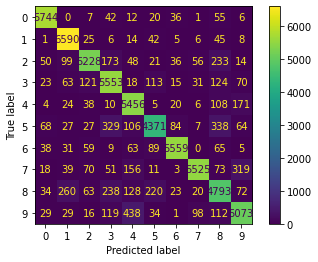

In [14]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_hat_train, values_format='.5g')

#### Making pipeline

In [15]:
pipe = Pipeline([('std_scaler', MinMaxScaler()),
                ('clf', Perceptron(random_state=1729))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', MinMaxScaler()),
                ('clf', Perceptron(random_state=1729))])

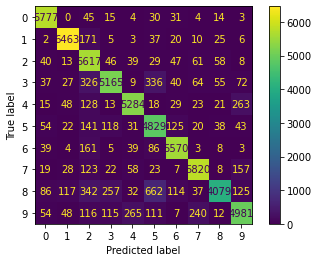

In [16]:
y_hat_train = pipe.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_hat_train, values_format='.5g')

#### Grid Search

In [18]:
y_train = y_train.astype(float)
#initialize new variable names with all -1
y_train_0 = -1 * np.ones(y_train.shape[0])
y_test_0 = -1 * np.ones(y_test.shape[0])

#find indices of digit 0 image
indx_0 = np.where(y_train == 0)
y_train_0[indx_0] = 1
indx_0 = np.where(y_test == 0)
y_test_0[indx_0] = 1

In [19]:
pipe = Pipeline([('std_scaler', MinMaxScaler()),
                ('clf', Perceptron(random_state=1729))])

scoring = make_scorer(hinge_loss, greater_is_better=False)
lr_grid = [1/2 ** n for n in range(1,6)]
bin_clf_gscv = GridSearchCV(pipe, param_grid={"clf__eta0": lr_grid}, scoring=scoring, cv=5)
bin_clf_gscv.fit(X_train, y_train_0)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', MinMaxScaler()),
                                       ('clf', Perceptron(random_state=1729))]),
             param_grid={'clf__eta0': [0.5, 0.25, 0.125, 0.0625, 0.03125]},
             scoring=make_scorer(hinge_loss, greater_is_better=False))

In [20]:
pprint(bin_clf_gscv.cv_results_)

{'mean_fit_time': array([1.78677459, 1.7753027 , 1.52834163, 1.47263231, 1.58518314]),
 'mean_score_time': array([0.07566094, 0.07384114, 0.07877488, 0.08170605, 0.10450144]),
 'mean_test_score': array([-0.01983333, -0.01963333, -0.0206    , -0.0229    , -0.02413333]),
 'param_clf__eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'clf__eta0': 0.5},
            {'clf__eta0': 0.25},
            {'clf__eta0': 0.125},
            {'clf__eta0': 0.0625},
            {'clf__eta0': 0.03125}],
 'rank_test_score': array([2, 1, 3, 4, 5], dtype=int32),
 'split0_test_score': array([-0.01916667, -0.01916667, -0.01916667, -0.02      , -0.02316667]),
 'split1_test_score': array([-0.01983333, -0.01983333, -0.01983333, -0.02783333, -0.02783333]),
 'split2_test_score': array([-0.01916667, -0.01916667, -0.02066667, -0.02066667, -0.0185    ]),
 'split3_test_score': array([-0.01

In [21]:
bin_clf_gscv.best_params_

{'clf__eta0': 0.25}